In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
df= pd.read_csv("avocado.csv")

importing the csv file

In [3]:
df.shape

(18249, 14)

checking out the shape of the dataframe

In [4]:
df.columns  

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

checking out the columns

In [5]:
df.head() 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


checking out all the statistical measures of the dataframe

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Well as a first observation we can see that we are lucky, we dont have any missing values (18249 complete data) and 13 columns. Now let's do some Feature Engineering on the Date Feature in pre-processing later so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

In [8]:
df.isnull().sum() 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see all columns having count 18249. Looks like it doesn't contain missing values

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it now 

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:xlabel='AveragePrice'>

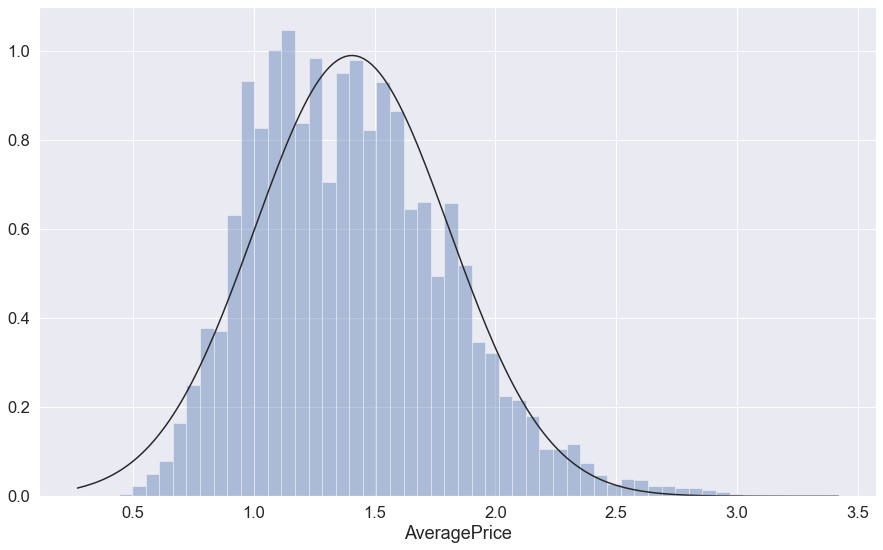

In [12]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.

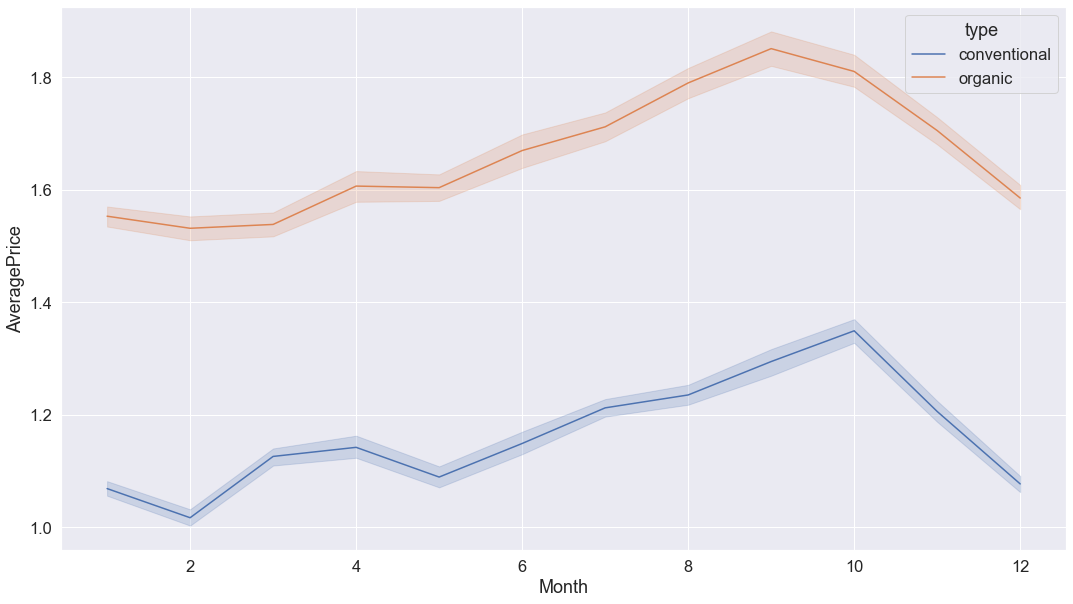

In [13]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

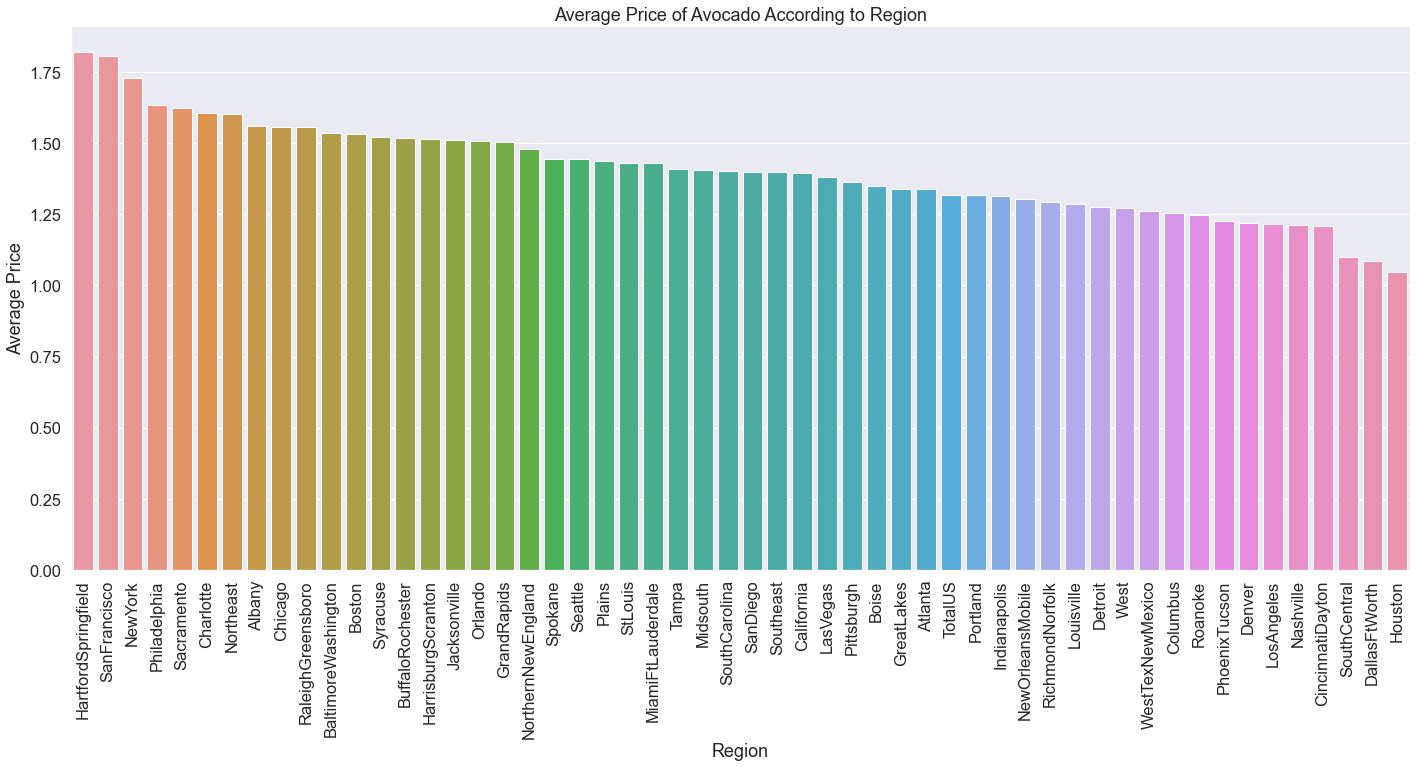

In [14]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Looks like these region are where price is very high

    .HartfordSpringfield
    
    .SanFrancisco
    
    .NewYork
    
    .Philadelphia
    
    .Sacramento

Text(0.5, 1.0, 'Average of Total Volume According to Region')

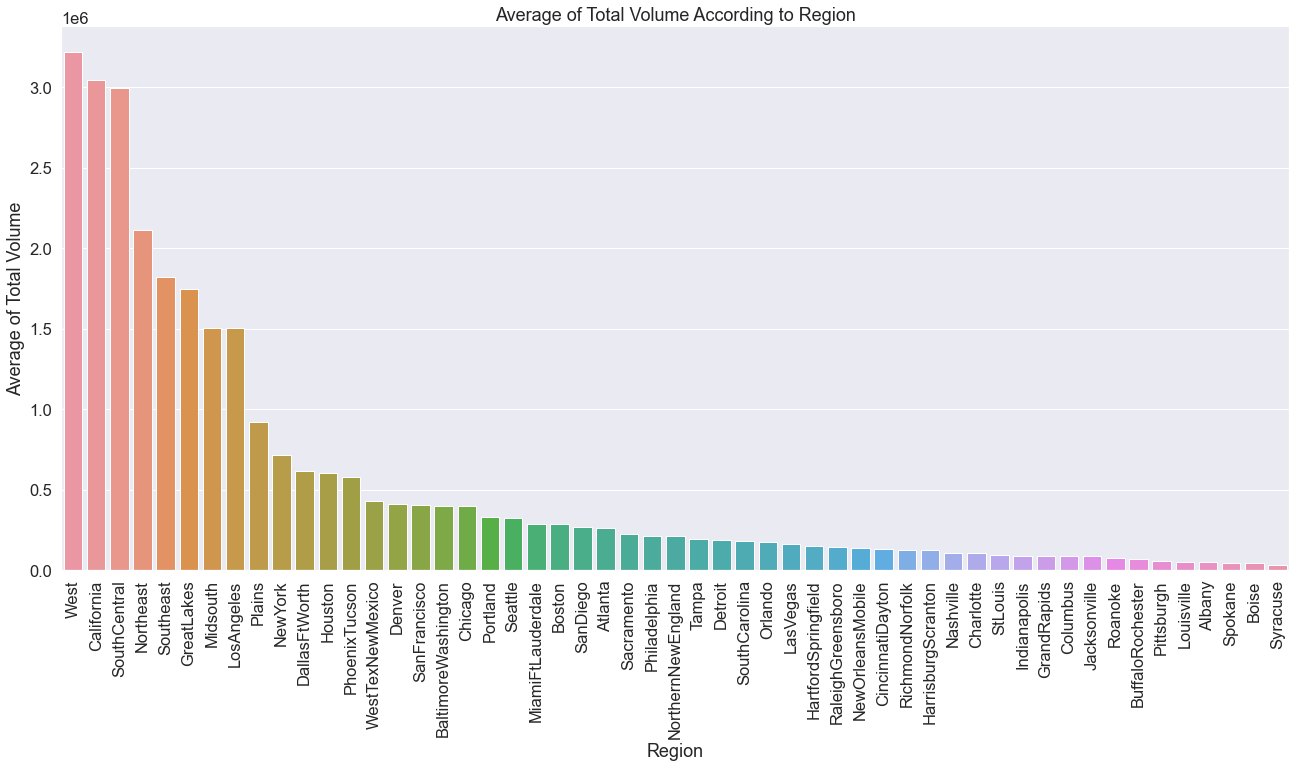

In [15]:

filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Looks like these region are where Consumption is very high:

.West

.California

.SouthCentral

.Northeast

.Southeast

Text(0.5, 1.0, 'Average Price')

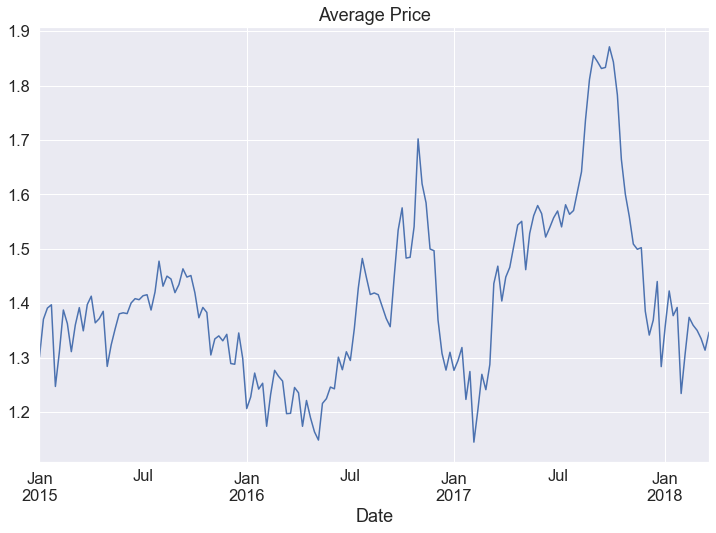

In [16]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

This also shows there was a huge hike in prices after July 2017 and before Jan 2018

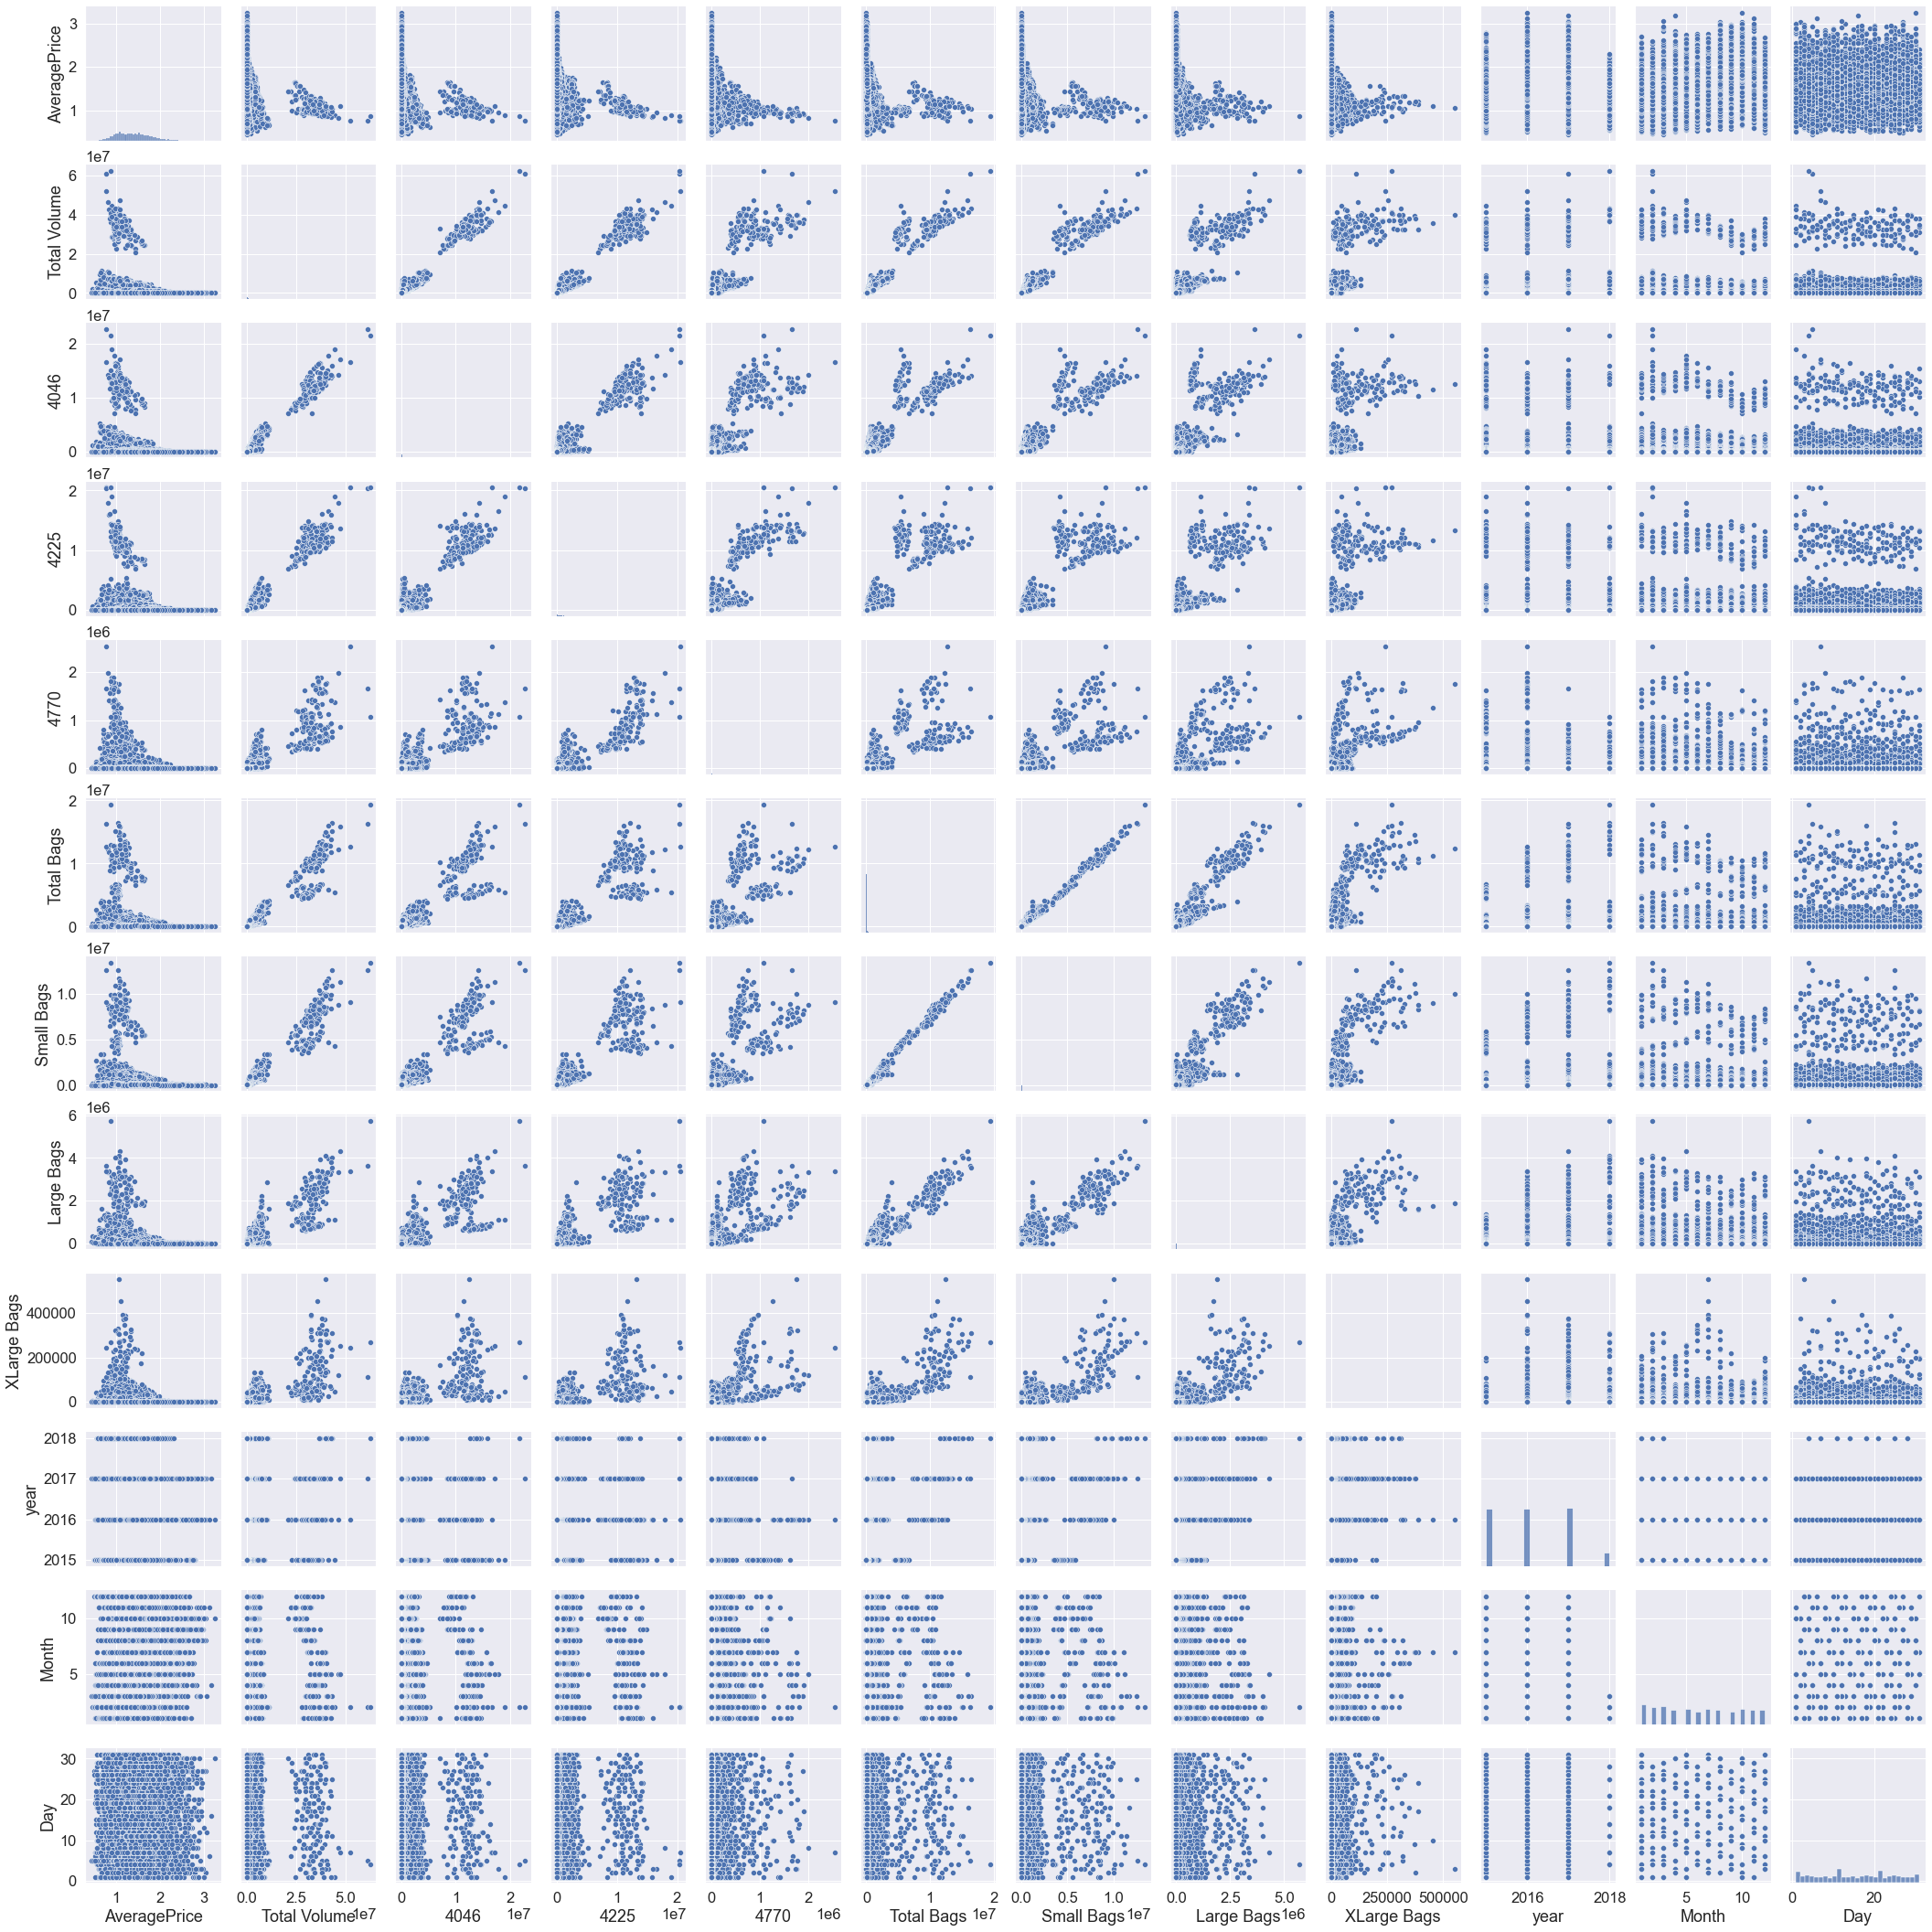

In [17]:
sns.pairplot(df)

Here i tried to visualize the relation between all the columns with respect to each other with pair plot

In [18]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

here i tried to check the skewness across the column

In [19]:
skew = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags',
       'Small Bags','Large Bags','XLarge Bags',]
for col in skew:
    if df.skew().loc[col]>0.055:
        df[col] = np.log1p(df[col])

here i removed the skewness 

# Plotting outliers

AveragePrice       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Total Volume    AxesSubplot(0.327174,0.657941;0.168478x0.222059)
4046            AxesSubplot(0.529348,0.657941;0.168478x0.222059)
4225            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
4770               AxesSubplot(0.125,0.391471;0.168478x0.222059)
Total Bags      AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Small Bags      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Large Bags      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
XLarge Bags           AxesSubplot(0.125,0.125;0.168478x0.222059)
year               AxesSubplot(0.327174,0.125;0.168478x0.222059)
Month              AxesSubplot(0.529348,0.125;0.168478x0.222059)
Day                AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

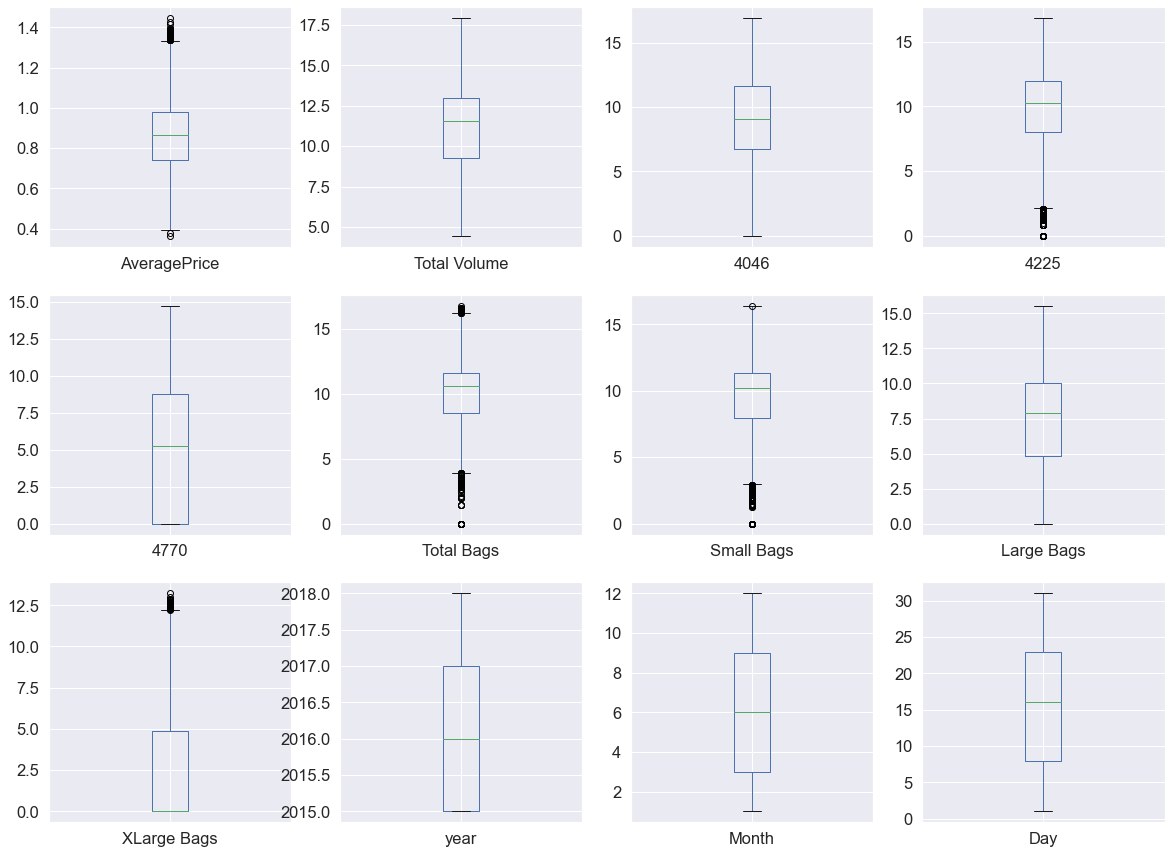

In [20]:
df.plot(kind = 'box',subplots = True,layout=(3,4),figsize = (20,15))

Here i tried to plot the outliers present in the dataset and it looks like the outliers does exist in the data set so we try to remove or minimise the outliers using zscore

In [21]:
from sklearn.preprocessing import LabelEncoder

cols = ['type', 'year', 'region']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0,12,27
1,2015-12-20,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0,12,20
2,2015-12-13,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0,12,13
3,2015-12-06,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0,12,6
4,2015-11-29,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0,11,29


i used labelencoder to encode the categorical variables

# removing outliers

In [22]:
df.drop('Date',axis = 1,inplace = True)

In [23]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.11191784, 0.10728205, 0.60975177, ..., 1.7002522 , 1.64763162,
        1.29185687],
       [0.06002047, 0.1759487 , 0.73770703, ..., 1.7002522 , 1.64763162,
        0.49423066],
       [1.25556016, 0.15869039, 0.68884013, ..., 1.7002522 , 1.64763162,
        0.30339555],
       ...,
       [1.15374345, 0.77890112, 0.56825116, ..., 1.70081131, 1.46495942,
        0.60817726],
       [1.2793746 , 0.70779758, 0.49440715, ..., 1.70081131, 1.46495942,
        0.18944895],
       [0.6003593 , 0.67454176, 0.30415101, ..., 1.70081131, 1.46495942,
        0.98707516]])

In [24]:
threshold = 3
print(np.where(z>3))

(array([ 5482,  5483,  5484,  5485,  8344,  8345,  9189,  9190,  9191,
        9192,  9192,  9203,  9204,  9205,  9206,  9211,  9212,  9212,
        9213,  9218,  9219,  9220,  9221,  9293,  9294,  9298,  9668,
        9894,  9894, 10154, 10232, 10234, 10324, 10325, 10326, 10327,
       10331, 10332, 10333, 10334, 10334, 10375, 10377, 10380, 10382,
       10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531, 10532,
       10533, 10534, 10535, 10536, 10562, 10563, 10566, 11011, 11012,
       11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022,
       11023, 11024, 11024, 11025, 11026, 11027, 11028, 11029, 11030,
       11031, 11032, 11033, 11034, 11035, 11036, 11037, 11039, 11040,
       11041, 11042, 11314, 11316, 11318, 11319, 11320, 11320, 11321,
       11321, 11322, 11324, 11325, 11325, 11326, 11327, 11329, 11330,
       11331, 11332, 11333, 11333, 11334, 11335, 11336, 11337, 11338,
       11338, 11339, 11340, 11341, 11342, 11347, 11347, 11348, 11348,
       11349, 11349

In [25]:
df_new = df[(z<3).all(axis = 1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0,12,27
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0,12,20
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0,12,13
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0,12,6
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,3,53,2,4
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,3,53,1,28
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,3,53,1,21
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,3,53,1,14


In [26]:
print(df_new.shape)
print(df.shape)

(17928, 14)
(18249, 14)


here i minimised the outliers in dataframe

<AxesSubplot:>

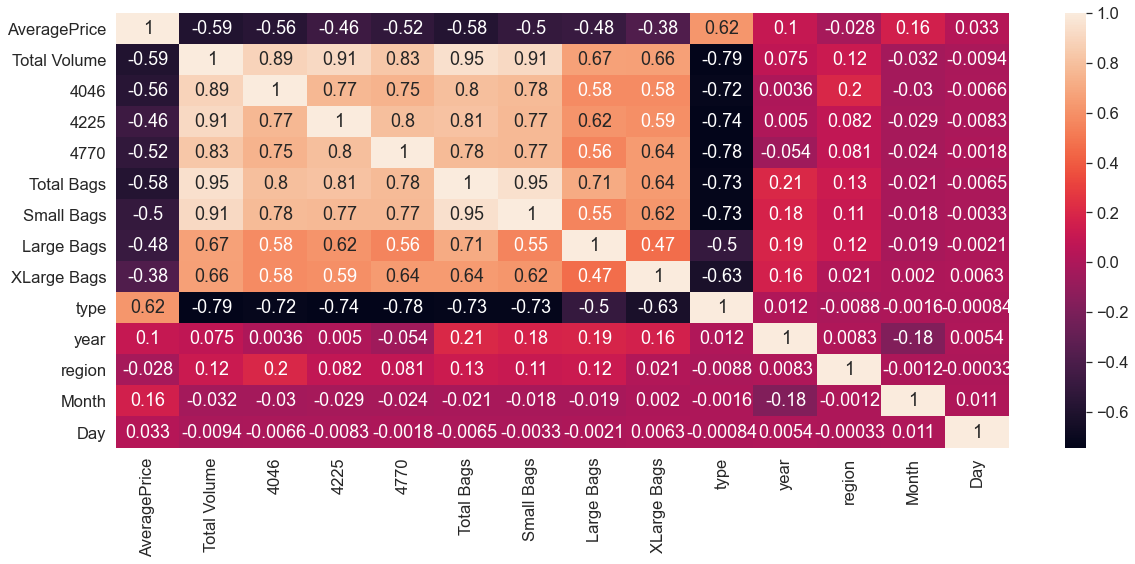

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df_new.corr(),annot = True,robust = True)

here i ploted the heatmap to check the multicolinearity across the columns

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(len(df_new.columns))]
  
print(vif_data)

         feature         VIF
0   AveragePrice   42.373863
1   Total Volume  915.321323
2           4046   47.562570
3           4225  115.576468
4           4770   10.764075
5     Total Bags  765.996601
6     Small Bags  268.180630
7     Large Bags   13.764334
8    XLarge Bags    2.845883
9           type    7.440394
10          year    3.821007
11        region    4.248493
12         Month    4.620057
13           Day    4.147896


In [29]:
df_new.drop(columns=['Total Bags','Total Volume'],axis = 1,inplace = True)

here i used vif technique to check the amount of multicolinearity across the column and removed the column which have high multicolinearity

# Preprocessing

In [30]:
# now split the data into feature and target variables
x = df_new.drop(columns = ['AveragePrice','region'])
y = df_new['AveragePrice']

here we split the dataframe into x and y

In [31]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

here i used the standard scaller to scale the values across the columns

In [32]:
from sklearn.model_selection import train_test_split
# spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = .25,random_state = 0)

here i splited the data into training set and testing set

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [34]:
lr = LinearRegression()
rfc = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

model = [lr,rfc,dt,knn]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('training score: ',i,'is',i.score(x_train,y_train))
    print('testing score: ',i,'is',i.score(x_test,y_test))
    
    # The mean squared error
    print("Mean squared error: ",i,'is',mean_squared_error(y_test,pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: ",i,'is', r2_score(y_test,pred))
    # report performance
    
    
    print('\n')

training score:  LinearRegression() is 0.5216410183916518
testing score:  LinearRegression() is 0.5046118761150509
Mean squared error:  LinearRegression() is 0.013257036619216657
Coefficient of determination:  LinearRegression() is 0.5046118761150509


training score:  RandomForestRegressor() is 0.9829698185265714
testing score:  RandomForestRegressor() is 0.8768247189483702
Mean squared error:  RandomForestRegressor() is 0.0032962825161771533
Coefficient of determination:  RandomForestRegressor() is 0.8768247189483702


training score:  DecisionTreeRegressor() is 1.0
testing score:  DecisionTreeRegressor() is 0.7471780231250644
Mean squared error:  DecisionTreeRegressor() is 0.0067657459756790056
Coefficient of determination:  DecisionTreeRegressor() is 0.7471780231250644


training score:  KNeighborsRegressor() is 0.8557028332924763
testing score:  KNeighborsRegressor() is 0.7825486803059395
Mean squared error:  KNeighborsRegressor() is 0.005819195029291117
Coefficient of determinati

Looks like knn model is working good so we move ahead with RandomForestRegressor

# Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['squared_error','absolute_error', 'poisson'],
              'n_estimators': [10,30,50,70,90,100],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4]}
rfr= RandomForestRegressor()
clf = GridSearchCV(estimator = rfr,param_grid = parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'poisson',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

Here i used hyperparameter tuning so that i could get the maximum accuracy

In [38]:
rfr2 = RandomForestRegressor(criterion= 'poisson',
                         max_features = 'sqrt',
                         min_samples_leaf = 1,
                         n_estimators = 100)
rfr2.fit(x_train,y_train)
print(rfr2.score(x_train,y_train))
print(rfr2.score(x_test,y_test))

0.9631549791221383
0.7453649101747817


Now Here i used the required parameter in randomforest classifier and tries to increase the accuracy

In [40]:
pred_final2 = rfr2.predict(x_test)

Text(0, 0.5, 'Predicted')

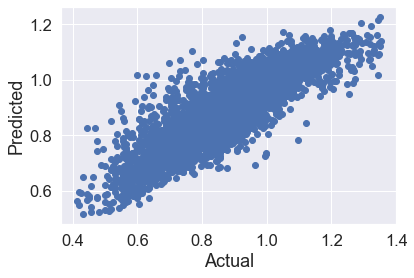

In [41]:
# checking out the differnce between actual and predicted values
plt.scatter(x = y_test,y = pred_final2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

ploting the actual and predicted values in a graph

# prediction with region

In [42]:
# now split the data into feature and target variables
x2 = df_new.drop(columns = ['AveragePrice','region'])
y2 = df_new['region']

here we split the dataframe into x and y

In [50]:
print(x2.shape)
print(y2.shape)

(17928, 10)
(17928,)


here i checked the shape of target and feature variable

In [43]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2_scaled = sc.fit_transform(x2)

here i used the standard scaller to scale the values across the columns

In [44]:
# spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x2_scaled,y2,test_size = .25,random_state = 0)

here i splited the data into training set and testing set

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

model = [lr,rfc,dt,knn]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('Accuracy score of',i,'is',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression() is 0.46921017402945114
[[54  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 54 ...  0  0  1]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  1 76  0]
 [ 0  3  6 ...  0  0 10]]
              precision    recall  f1-score   support

           0       0.58      0.61      0.59        89
           1       0.31      0.56      0.40        79
           2       0.41      0.59      0.49        91
           3       0.60      0.47      0.53        91
           4       0.43      0.48      0.46        90
           5       0.44      0.34      0.38        71
           6       0.93      0.90      0.91       101
           7       0.49      0.62      0.54        81
           8       0.58      0.65      0.61        97
           9       0.41      0.64      0.50        78
          10       0.50      0.28      0.36        82
          11       0.65      0.61      0.63        80
          12       0.43      0.47      0.45        89
          13       0.27  

Accuracy score of KNeighborsClassifier() is 0.5669344042838019
[[72  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  1]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  1 70  0]
 [ 0  2  3 ...  0  0 20]]
              precision    recall  f1-score   support

           0       0.60      0.81      0.69        89
           1       0.29      0.47      0.36        79
           2       0.56      0.80      0.66        91
           3       0.65      0.76      0.70        91
           4       0.65      0.63      0.64        90
           5       0.36      0.44      0.39        71
           6       0.71      0.66      0.68       101
           7       0.41      0.58      0.48        81
           8       0.82      0.75      0.78        97
           9       0.27      0.37      0.31        78
          10       0.32      0.49      0.39        82
          11       0.57      0.82      0.68        80
          12       0.75      0.66      0.70        89
          13       0.39 

And i used necessary machine learning models deploid the training set and testing set and checked the accuracy

In [49]:
from sklearn.model_selection import cross_val_score
for i in model:
    score = cross_val_score(i,x2,y2,cv =7)
    print('cv score of',i,'is',score.mean())

cv score of LogisticRegression() is 0.17124271053823237
cv score of RandomForestClassifier() is 0.7479897547896454
cv score of DecisionTreeClassifier() is 0.5881301202156182
cv score of GaussianNB() is 0.034025449817363655


i used cross_validation_score to check if there is any underfitting or overfitting . Looks like randomforest model is giving the acurate score

# Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

                'max_features': ['auto', 'sqrt'],

                'min_samples_leaf': [1, 2, 4],

                'min_samples_split': [2, 5, 10]}
rfr2= RandomForestClassifier()
clf = GridSearchCV(estimator = rfr2,param_grid = parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Here i used hyperparameter tuning so that i could get the maximum accuracy

In [56]:
rfr2 = RandomForestClassifier(max_depth= 70,
                         max_features = 'sqrt',
                         min_samples_leaf = 1,
                         min_samples_split = 2)
rfr2.fit(x_train,y_train)
print(rfr2.score(x_train,y_train))
print(rfr2.score(x_test,y_test))

1.0
0.8998215082552432


Now Here i used the required parameter in randomforest classifier and tries to increase the accuracy

In [58]:
pred_final3 = rfr2.predict(x_test)
print(accuracy_score(y_test,pred_final3))

0.8998215082552432


# Now we dump the final output

In [ ]:
import pickle
filename = 'avacado_project.pkl'
pickle.dump(rfr2,open(filename,'wb'))